The original Notebook was written by:

1. The work on the following project was done by Piyush Singla and Nikhil Sharma 4.
2. link to Piyush Singla kaggle account -> https://www.kaggle.com/mpiyu20
3. link to Nikhil Sharma kaggle account -> https://www.kaggle.com/nikhilsharma4

The notebook was modified by me Luis Méndez

1. SETUP

In this section you can see all the libraries needed 

Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

2. DATA LOAD

In this section you can see the code to import the data sets. Also if you want to download the data sets you can follow this link: https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction?datasetId=522275

Importing the datasets

In [3]:
directory = "https://github.com/luismeparra/luigicode/raw/main/data/"
feature_tables = ['train.csv', 'test.csv']

df_train = directory + feature_tables[0]
df_test = directory + feature_tables[1]

# Create dataframes
print(f'Reading csv from {df_train}...')
df = pd.read_csv(df_train)
print('...Complete')

print(f'Reading csv from {df_train}...')
df2 = pd.read_csv(df_test)
print('...Complete')

Reading csv from /kaggle/input/airline-passenger-satisfaction/train.csv...
...Complete
Reading csv from /kaggle/input/airline-passenger-satisfaction/train.csv...
...Complete


In [4]:
df.head()

Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  2  ...                       1   
2                                  2  ...                       5   
3                                  5  ...                       2   
4                                  3  ...                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  
2                       0.0                satisfied  
3                       9.0  neutral or dissatisfied  
4                       0.0                satisfied  

[5 rows x 25 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
Unnamed: 0                           103904 non-null int64
id                                   103904 non-null int64
Gender                               103904 non-null object
Customer Type                        103904 non-null object
Age                                  103904 non-null int64
Type of Travel                       103904 non-null object
Class                                103904 non-null object
Flight Distance                      103904 non-null int64
Inflight wifi service                103904 non-null int64
Departure/Arrival time convenient    103904 non-null int64
Ease of Online booking               103904 non-null int64
Gate location                        103904 non-null int64
Food and drink                       103904 non-null int64
Online boarding                      103904 non-null int64
Seat comfort                         103904 non-null int64


3. DATA EXPLORATION

In this section you can see the statistical analysis and visualizations

Checking the missing values in the dataset

In [6]:
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

percentage of missing data

In [7]:
df.isnull().sum()/len(df)

Unnamed: 0                           0.000000
id                                   0.000000
Gender                               0.000000
Customer Type                        0.000000
Age                                  0.000000
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.000000
Inflight wifi service                0.000000
Departure/Arrival time convenient    0.000000
Ease of Online booking               0.000000
Gate location                        0.000000
Food and drink                       0.000000
Online boarding                      0.000000
Seat comfort                         0.000000
Inflight entertainment               0.000000
On-board service                     0.000000
Leg room service                     0.000000
Baggage handling                     0.000000
Checkin service                      0.000000
Inflight service                     0.000000
Cleanliness                       

We have to remove the missing data in column (later)

In [8]:
df.describe().transpose()

count          mean           std   min  \
Unnamed: 0                         103904.0  51951.500000  29994.645522   0.0   
id                                 103904.0  64924.210502  37463.812252   1.0   
Age                                103904.0     39.379706     15.114964   7.0   
Flight Distance                    103904.0   1189.448375    997.147281  31.0   
Inflight wifi service              103904.0      2.729683      1.327829   0.0   
Departure/Arrival time convenient  103904.0      3.060296      1.525075   0.0   
Ease of Online booking             103904.0      2.756901      1.398929   0.0   
Gate location                      103904.0      2.976883      1.277621   0.0   
Food and drink                     103904.0      3.202129      1.329533   0.0   
Online boarding                    103904.0      3.250375      1.349509   0.0   
Seat comfort                       103904.0      3.439396      1.319088   0.0   
Inflight entertainment             103904.0      3.358158      1.332991   0.0   
On-board service                   103904.0      3.382363      1.288354   0.0   
Leg room service                   103904.0      3.351055      1.315605   0.0   
Baggage handling                   103904.0      3.631833      1.180903   1.0   
Checkin service                    103904.0      3.304290      1.265396   0.0   
Inflight service                   103904.0      3.640428      1.175663   0.0   
Cleanliness                        103904.0      3.286351      1.312273   0.0   
Departure Delay in Minutes         103904.0     14.815618     38.230901   0.0   
Arrival Delay in Minutes           103594.0     15.178678     38.698682   0.0   

                                        25%      50%       75%       max  
Unnamed: 0                         25975.75  51951.5  77927.25  103903.0  
id                                 32533.75  64856.5  97368.25  129880.0  
Age                                   27.00     40.0     51.00      85.0  
Flight Distance                      414.00    843.0   1743.00    4983.0  
Inflight wifi service                  2.00      3.0      4.00       5.0  
Departure/Arrival time convenient      2.00      3.0      4.00       5.0  
Ease of Online booking                 2.00      3.0      4.00       5.0  
Gate location                          2.00      3.0      4.00       5.0  
Food and drink                         2.00      3.0      4.00       5.0  
Online boarding                        2.00      3.0      4.00       5.0  
Seat comfort                           2.00      4.0      5.00       5.0  
Inflight entertainment                 2.00      4.0      4.00       5.0  
On-board service                       2.00      4.0      4.00       5.0  
Leg room service                       2.00      4.0      4.00       5.0  
Baggage handling                       3.00      4.0      5.00       5.0  
Checkin service                        3.00      3.0      4.00       5.0  
Inflight service                       3.00      4.0      5.00       5.0  
Cleanliness                            2.00      3.0      4.00       5.0  
Departure Delay in Minutes             0.00      0.0     12.00    1592.0  
Arrival Delay in Minutes               0.00      0.0     13.00    1584.0

# Exploratory Data Analysis

Cheking the heatmap of correlation with continous variables

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

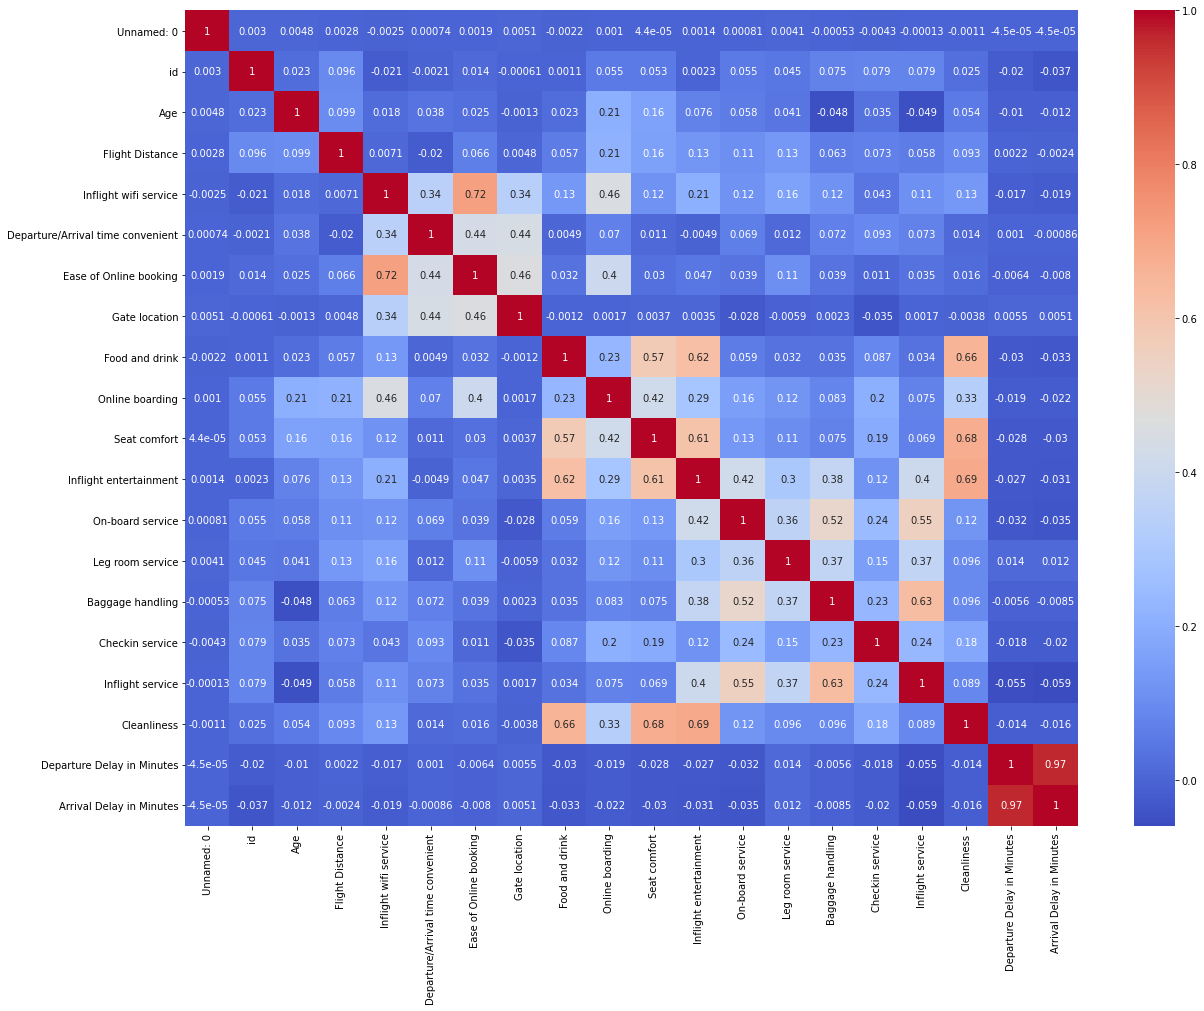

In [9]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.tight_layout

In [10]:
df['satisfaction'].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

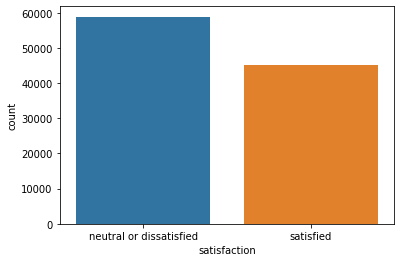

In [11]:
sns.countplot(x='satisfaction',data=df)

From countplot we can say the classes are balanced 

Now converting the satisfaction column to continuous variable. For this, a function named satisfac is created

In [12]:
def satisfac(string):
    if string == 'satisfied': return 1
    else: return 0

df['satisfactionN'] =df['satisfaction'].apply(satisfac)    

In [13]:
df.head(5)

Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  ...  On-board service  Leg room service  \
0                                  4  ...                 4                 3   
1                                  2  ...                 1                 5   
2                                  2  ...                 4                 3   
3                                  5  ...                 2                 5   
4                                  3  ...                 3                 4   

   Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                 4                4                 5            5   
1                 3                1                 4            1   
2                 4                4                 4            5   
3                 3                1                 4            2   
4                 4                3                 3            3   

   Departure Delay in Minutes  Arrival Delay in Minutes  \
0                          25                      18.0   
1                           1                       6.0   
2                           0                       0.0   
3                          11                       9.0   
4                           0                       0.0   

              satisfaction  satisfactionN  
0  neutral or dissatisfied              0  
1  neutral or dissatisfied              0  
2                satisfied              1  
3  neutral or dissatisfied              0  
4                satisfied              1  

[5 rows x 26 columns]

So column with numerical value of satisfaction is created  named satisfactionN,
we can drop the satisfaction column

In [14]:
df.drop('satisfaction',inplace=True,axis=1)

Now that satisfaction is continous 

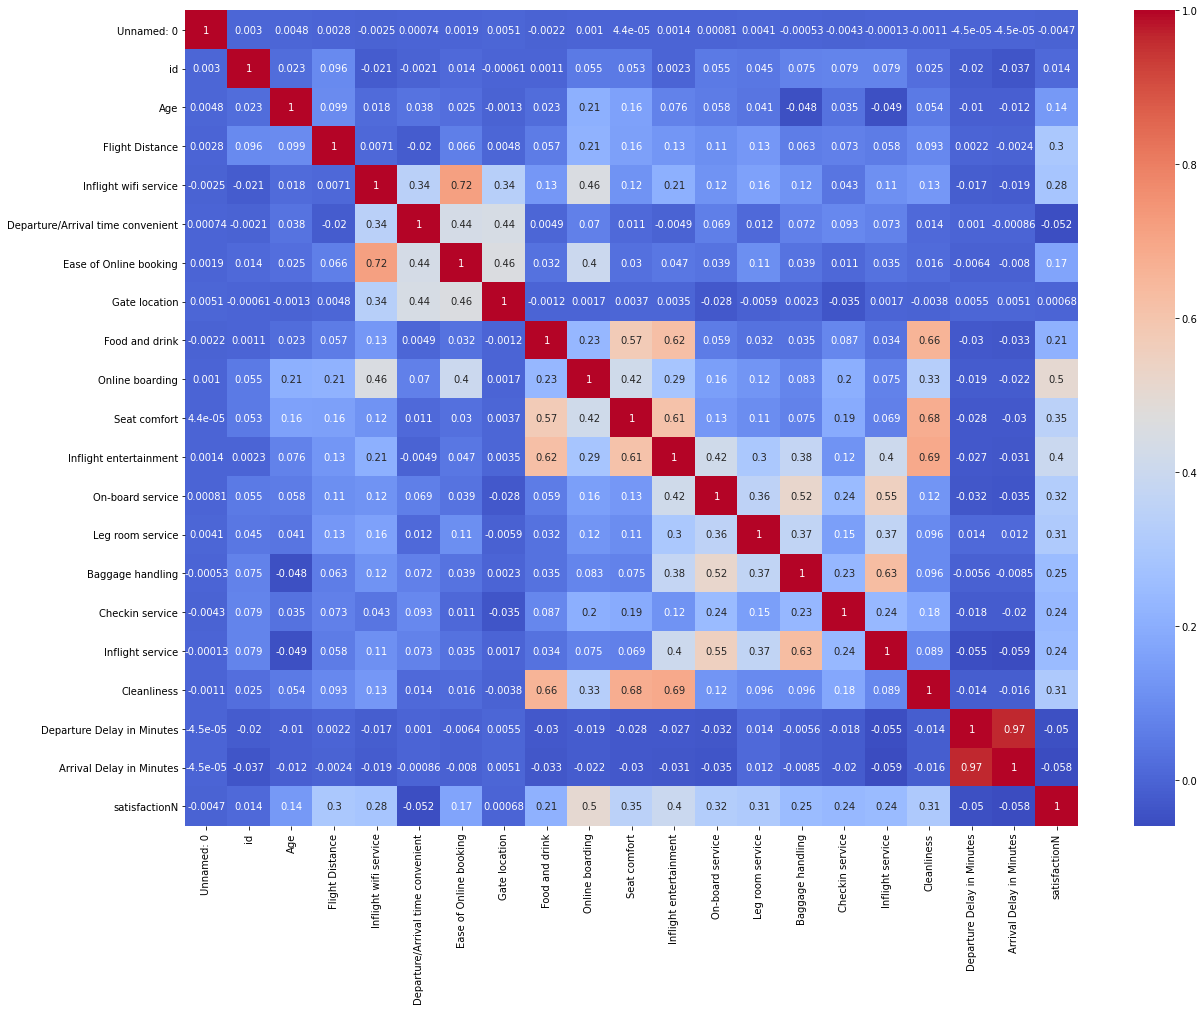

In [15]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot = True,cmap='coolwarm')

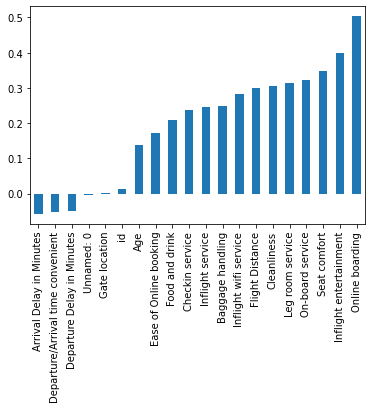

In [16]:
df.corr()['satisfactionN'].sort_values().drop('satisfactionN').plot(kind='bar')

Important continuous factors which contribute more correlation with customer satisfaction are  'Inflight wifi service','Flight Distance','cleanliness','Leg room service','on board service','seat comfort','inflight entertainment','online boarding'

online boarding have maximum correlation with satisfaction

In [17]:
df['Online boarding'].value_counts()

4    30762
3    21804
5    20713
2    17505
1    10692
0     2428
Name: Online boarding, dtype: int64

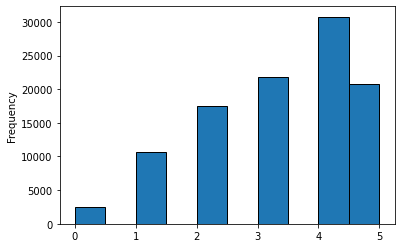

In [18]:
df['Online boarding'].plot(kind='hist',ec='black')

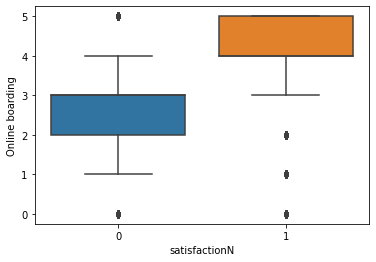

In [19]:
sns.boxplot(x='satisfactionN',y = 'Online boarding',data=df)

The more satisfied the person is with online boarding then there are greater chances that the person will be satisfied. Same is the case for all the other parameters 

In [20]:
df.head()

Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  2  ...                       1   
2                                  2  ...                       5   
3                                  5  ...                       2   
4                                  3  ...                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes  satisfactionN  
0                      18.0              0  
1                       6.0              0  
2                       0.0              1  
3                       9.0              0  
4                       0.0              1  

[5 rows x 25 columns]

4. DATA TRANSFORMATION

In this section you can see the data transformation

Converting the catagorical parameters to continous using pandas inbuild function get_dummies

In [21]:
GenderN = pd.get_dummies(df['Gender'],drop_first=True)
CustomerN = pd.get_dummies(df['Customer Type'],drop_first=True)
TypeN = pd.get_dummies(df['Type of Travel'],drop_first=True)
ClassN = pd.get_dummies(df['Class'],drop_first=True)
df = pd.concat([df,GenderN,CustomerN,TypeN,ClassN],axis =1)
df.drop(['Gender','Customer Type','Type of Travel','Class'],inplace =True,axis = 1)

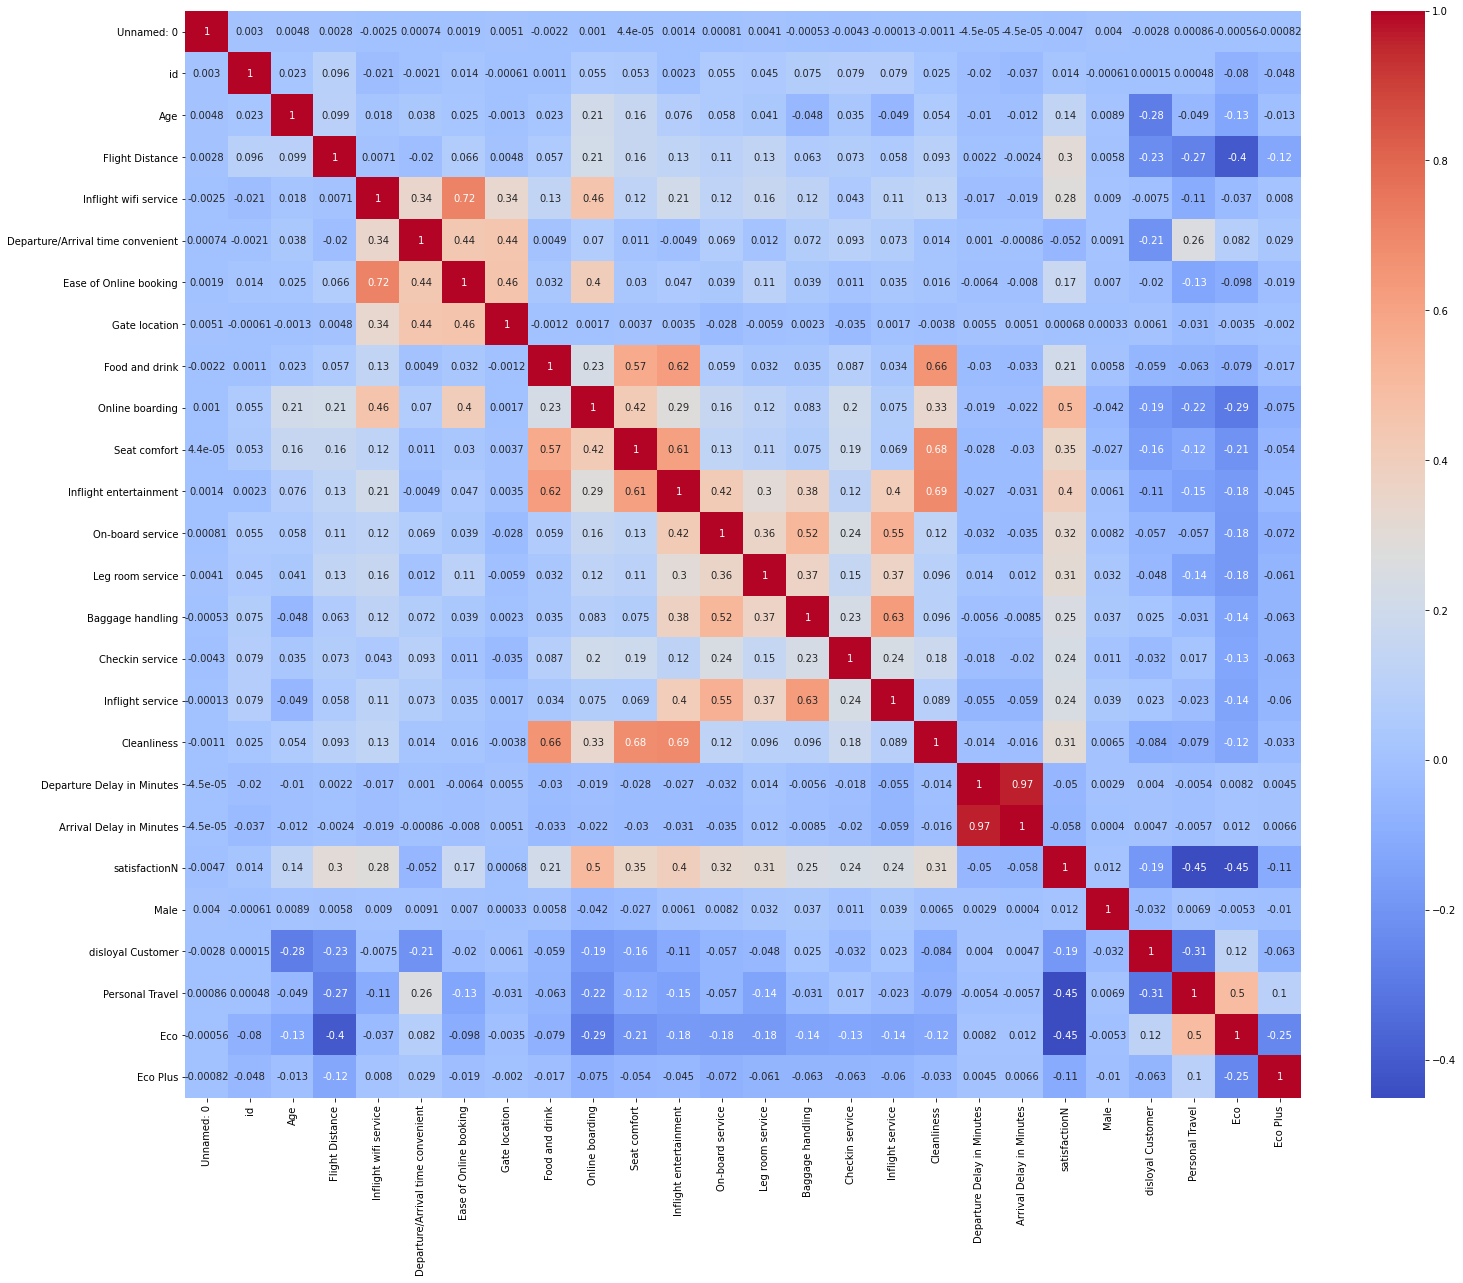

In [22]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),annot = True,cmap='coolwarm')

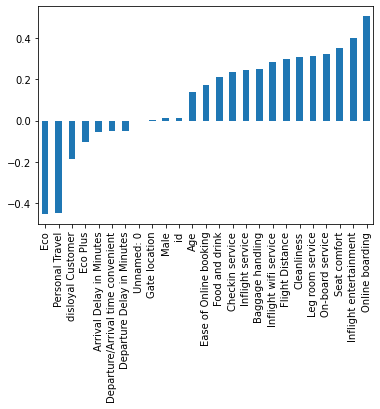

In [23]:
df.corr()['satisfactionN'].sort_values().drop('satisfactionN').plot(kind='bar')

Analysing the catagorical variables, we came to know that People travelling in economy class and on a personal travel are unlikely to get satisfied.Now we know that people choosing online boarding are most satisfied. Lets check the correlation of online boarding with others

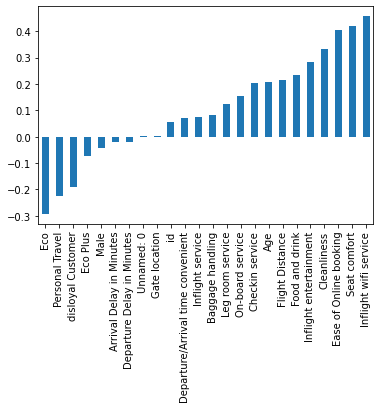

In [24]:
df.corr()['Online boarding'].sort_values().drop(['Online boarding','satisfactionN']).plot(kind='bar')

It is majorly correlated with inflight wifi service 

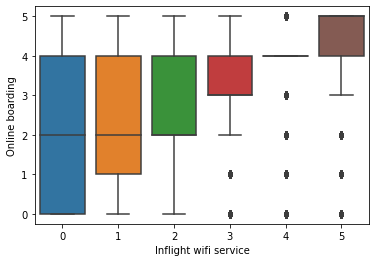

In [25]:
sns.boxplot(x='Inflight wifi service',y = 'Online boarding',data=df)

People who gets better service of inflight wifi likely to apply for online boarding and gives better rating.

Analysing some general trends from the dataset using Plotly -> interactive plots

In [26]:
df['Flight Distance'].iplot(kind='hist',bins=50)

Most of the flights are between 0 to 1000 kms

In [27]:
df['Age'].iplot(kind='hist',bins=50)

Age has a normal distribution with most people between 20 to 60

In [28]:
import plotly.express as px
fig = px.box(df, x="satisfactionN", y="Age", color="Eco")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

From the boxplot we can infer that people who are sitting in economy class between age 24 to 50 are likely to be more satisfied

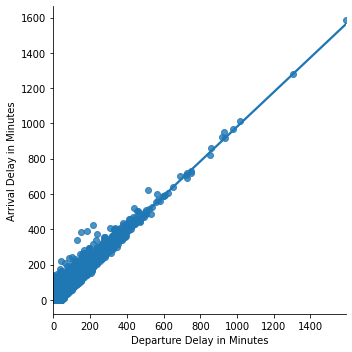

In [29]:
sns.lmplot(x='Departure Delay in Minutes',y='Arrival Delay in Minutes',data=df)

Arrival Delay and Departure delay have a linear relation, so we can drop one column

In [30]:
df.drop('Arrival Delay in Minutes',axis=1,inplace=True)

id and unnamed column doesn't contain any information for model training, so we can drop those column too.(Later)

# Preprocessing the data

Removing missing data

In [31]:
df.isnull().sum()/len(df)
# Only 0.002% data is missing, so we can drop the rows 
# Data was missing in only "Arrival delay in Minutes" column , so these steps are not necessary

Unnamed: 0                           0.0
id                                   0.0
Age                                  0.0
Flight Distance                      0.0
Inflight wifi service                0.0
Departure/Arrival time convenient    0.0
Ease of Online booking               0.0
Gate location                        0.0
Food and drink                       0.0
Online boarding                      0.0
Seat comfort                         0.0
Inflight entertainment               0.0
On-board service                     0.0
Leg room service                     0.0
Baggage handling                     0.0
Checkin service                      0.0
Inflight service                     0.0
Cleanliness                          0.0
Departure Delay in Minutes           0.0
satisfactionN                        0.0
Male                                 0.0
disloyal Customer                    0.0
Personal Travel                      0.0
Eco                                  0.0
Eco Plus        

In [32]:
df.dropna(axis=0,inplace=True)

Removing unnecessary data

In [33]:
df.drop(['Unnamed: 0','id'],axis=1,inplace=True)

5. Model Training

In this section you can see the model training section

# Applying Different models 

# Based on the performance,these three models suits our dataset quite efficiently
# 1. Random Forest Classifier
# 2. XgBoost
# 3. Naive Bayes(for general classification)

In [34]:
#importing the libraries
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

In [35]:
X_train = df.drop('satisfactionN',axis=1)
y_train = df['satisfactionN']

Also applying all the preprocessing on test set and splitting the data into X_test and y_test

In [36]:
df2['satisfactionN'] =df2['satisfaction'].apply(satisfac)
GenderN = pd.get_dummies(df2['Gender'],drop_first=True)
CustomerN = pd.get_dummies(df2['Customer Type'],drop_first=True)
TypeN = pd.get_dummies(df2['Type of Travel'],drop_first=True)
ClassN = pd.get_dummies(df2['Class'],drop_first=True)
df2 = pd.concat([df2,GenderN,CustomerN,TypeN,ClassN],axis =1)
df2.drop(['Gender','Customer Type','Type of Travel','Class'],inplace =True,axis = 1)
df2.drop('Arrival Delay in Minutes',axis=1,inplace=True)
df2.drop(['Unnamed: 0','id'],axis=1,inplace=True)

In [37]:
df2.drop('satisfaction',axis=1,inplace=True)
X_test = df2.drop('satisfactionN',axis=1)
y_test= df2['satisfactionN']

In [38]:
print("X_train {}\nX_test {}\ny_train {}\ny_test {}".format(X_train.shape,X_test.shape,y_train.shape,y_test.shape))

X_train (103904, 22)
X_test (25976, 22)
y_train (103904,)
y_test (25976,)


# Now applying Random forest

In [39]:
classifier1 = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0,n_jobs=-1)
classifier1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Predicting on test set 

In [40]:
y_pred = classifier1.predict(X_test)

In [41]:
# importing accuracy parameters
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_pred))
print('\n\n\n')
print('Confusion matrix : \n{}'.format(confusion_matrix(y_test,y_pred)))
print('\n')
print('Accuracy score : {}'.format(accuracy_score(y_test,y_pred)))
acc_random_forest = accuracy_score(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14573
           1       0.98      0.94      0.96     11403

    accuracy                           0.96     25976
   macro avg       0.97      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976





Confusion matrix : 
[[14300   273]
 [  670 10733]]


Accuracy score : 0.9636972590083154


# Now applying XGBoost

In [42]:
classifier2 = XGBClassifier(n_estimators = 500,n_jobs=-1)
classifier2.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [43]:
#Predicting on test set results
y_pred = classifier2.predict(X_test)

In [44]:
# importing accuracy parameters
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_pred))
print('\n\n\n')
print('Confusion matrix : \n{}'.format(confusion_matrix(y_test,y_pred)))
print('\n')
print('Accuracy score : {}'.format(accuracy_score(y_test,y_pred)))
acc_xgboost = accuracy_score(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.96      0.97      0.97     14573
           1       0.97      0.94      0.96     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976





Confusion matrix : 
[[14199   374]
 [  635 10768]]


Accuracy score : 0.9611564521096396


# Now applying naive_bayes

In [45]:
classifier3 = GaussianNB()
classifier3.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [46]:
#Predicting on test set results
y_pred = classifier3.predict(X_test)

In [47]:
# importing accuracy parameters
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_pred))
print('\n\n\n')
print('Confusion matrix : \n{}'.format(confusion_matrix(y_test,y_pred)))
print('\n')
print('Accuracy score : {}'.format(accuracy_score(y_test,y_pred)))
acc_naive_bayes = accuracy_score(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.86      0.90      0.88     14573
           1       0.86      0.81      0.83     11403

    accuracy                           0.86     25976
   macro avg       0.86      0.85      0.86     25976
weighted avg       0.86      0.86      0.86     25976





Confusion matrix : 
[[13050  1523]
 [ 2144  9259]]


Accuracy score : 0.8588312288266092


# Comparing the results

In [48]:
print('Accuracy:-\n')
print("Random Forest {}\nXGBoost {}\nNaive Bayes {}\n".format(acc_random_forest,acc_xgboost,acc_naive_bayes))

Accuracy:-

Random Forest 0.9636972590083154
XGBoost 0.9611564521096396
Naive Bayes 0.8588312288266092



# So Random Forest works best for this class with an Accuracy of 96.36%

6. SAVE THE MODEL

In this section you can see the code to save the model

In [ ]:
#importing the libraries
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB  
import pandas as pd  # Import pandas if not imported already
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle

##This can be extra:
# Create and train the RandomForestClassifier
classifier1 = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0, n_jobs=-1)
classifier1.fit(X_train, y_train)
##########


# Save the trained model using pickle
model_filename = 'random_forest_model.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(classifier1, model_file)


# Load the saved model from the file
loaded_model = None
with open(model_filename, 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Load new data for prediction (replace this with your actual new data)
new_data = pd.read_csv('new_data.csv')  # Load your new data
#It guess that the new data set is called "new_data.csv"

# Perform preprocessing on new_data if needed
X_new = new_data.drop('satisfactionN', axis=1)  # Adjust based on your data

# Use the loaded model to predict
y_pred_loaded = loaded_model.predict(X_new)


# Calculate accuracy using the loaded model's predictions
# Since this is new data, you won't have y_test for comparison
# You can simply print the predictions or save them as needed
print("Predicted labels using loaded model:", y_pred_loaded)
